# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

Проверено:
1. Perfomance score от manager name не зависит
2. Продолжительность работы от брака не зависит
3. Прожолжительность работы не зависит от возраста
4. Perfomance score от age не зависит
5. Perfomance score от sex не зависит
6. Hispanic/Latino ни на что не влияет

In [1]:
import psycopg2
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)

hr_dataset = pd.read_sql_query("select * from hr_dataset", conn)
production_staff = pd.read_sql_query("select * from production_staff", conn)
recruiting_costs = pd.read_sql_query("select * from recruiting_costs", conn)
salary_grid = pd.read_sql_query("select * from salary_grid", conn)

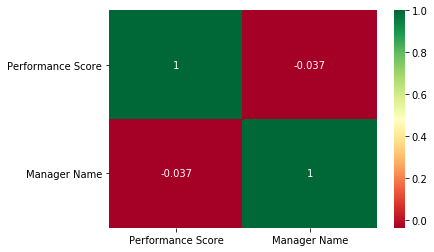

In [2]:
df = hr_dataset.copy()
df['Performance Score'] = df['Performance Score'].astype('category').cat.codes
df['Manager Name'] = df['Manager Name'].astype('category').cat.codes
df_corr = df[['Performance Score', 'Manager Name']].corr()
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.yticks(rotation=0)
plt.show()

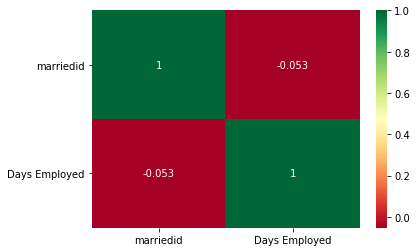

In [41]:
df = hr_dataset.copy()
df_corr = df[['marriedid', 'Days Employed']].corr()
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.yticks(rotation=0)
plt.show()

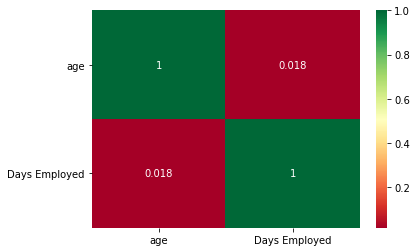

In [40]:
df = hr_dataset.copy()
df_corr = df[['age', 'Days Employed']].corr()
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.yticks(rotation=0)
plt.show()

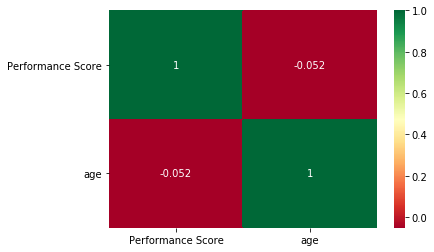

In [7]:
df = hr_dataset.copy()
df['Performance Score'] = df['Performance Score'].astype('category').cat.codes
df_corr = df[['Performance Score', 'age']].corr()
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.yticks(rotation=0)
plt.show()

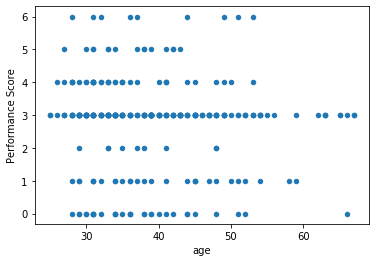

In [30]:
df = hr_dataset.copy()
df['Performance Score'] = df['Performance Score'].astype('category').cat.codes
df.plot.scatter(x='age', y='Performance Score')
plt.show()

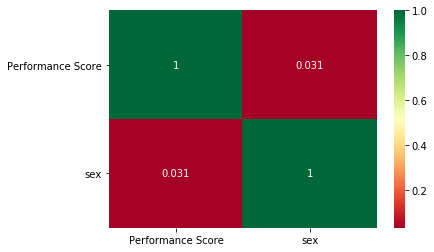

In [34]:
df = hr_dataset.copy()
df['Performance Score'] = df['Performance Score'].astype('category').cat.codes
df['sex'] = df['sex'].astype('category').cat.codes
df_corr = df[['Performance Score', 'sex']].corr()
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.yticks(rotation=0)
plt.show()

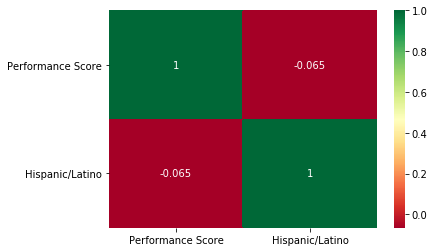

In [38]:
df = hr_dataset.copy()
df['Performance Score'] = df['Performance Score'].astype('category').cat.codes
df['Hispanic/Latino'] = df['Hispanic/Latino'].astype('category').cat.codes
df_corr = df[['Performance Score', 'Hispanic/Latino']].corr()
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.yticks(rotation=0)
plt.show()

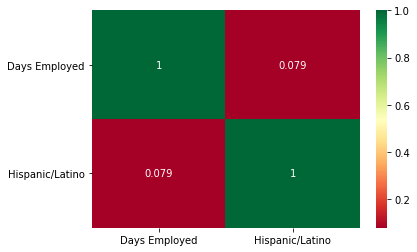

In [43]:
df = hr_dataset.copy()
df['Hispanic/Latino'] = df['Hispanic/Latino'].astype('category').cat.codes
df_corr = df[['Days Employed', 'Hispanic/Latino']].corr()
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.yticks(rotation=0)
plt.show()

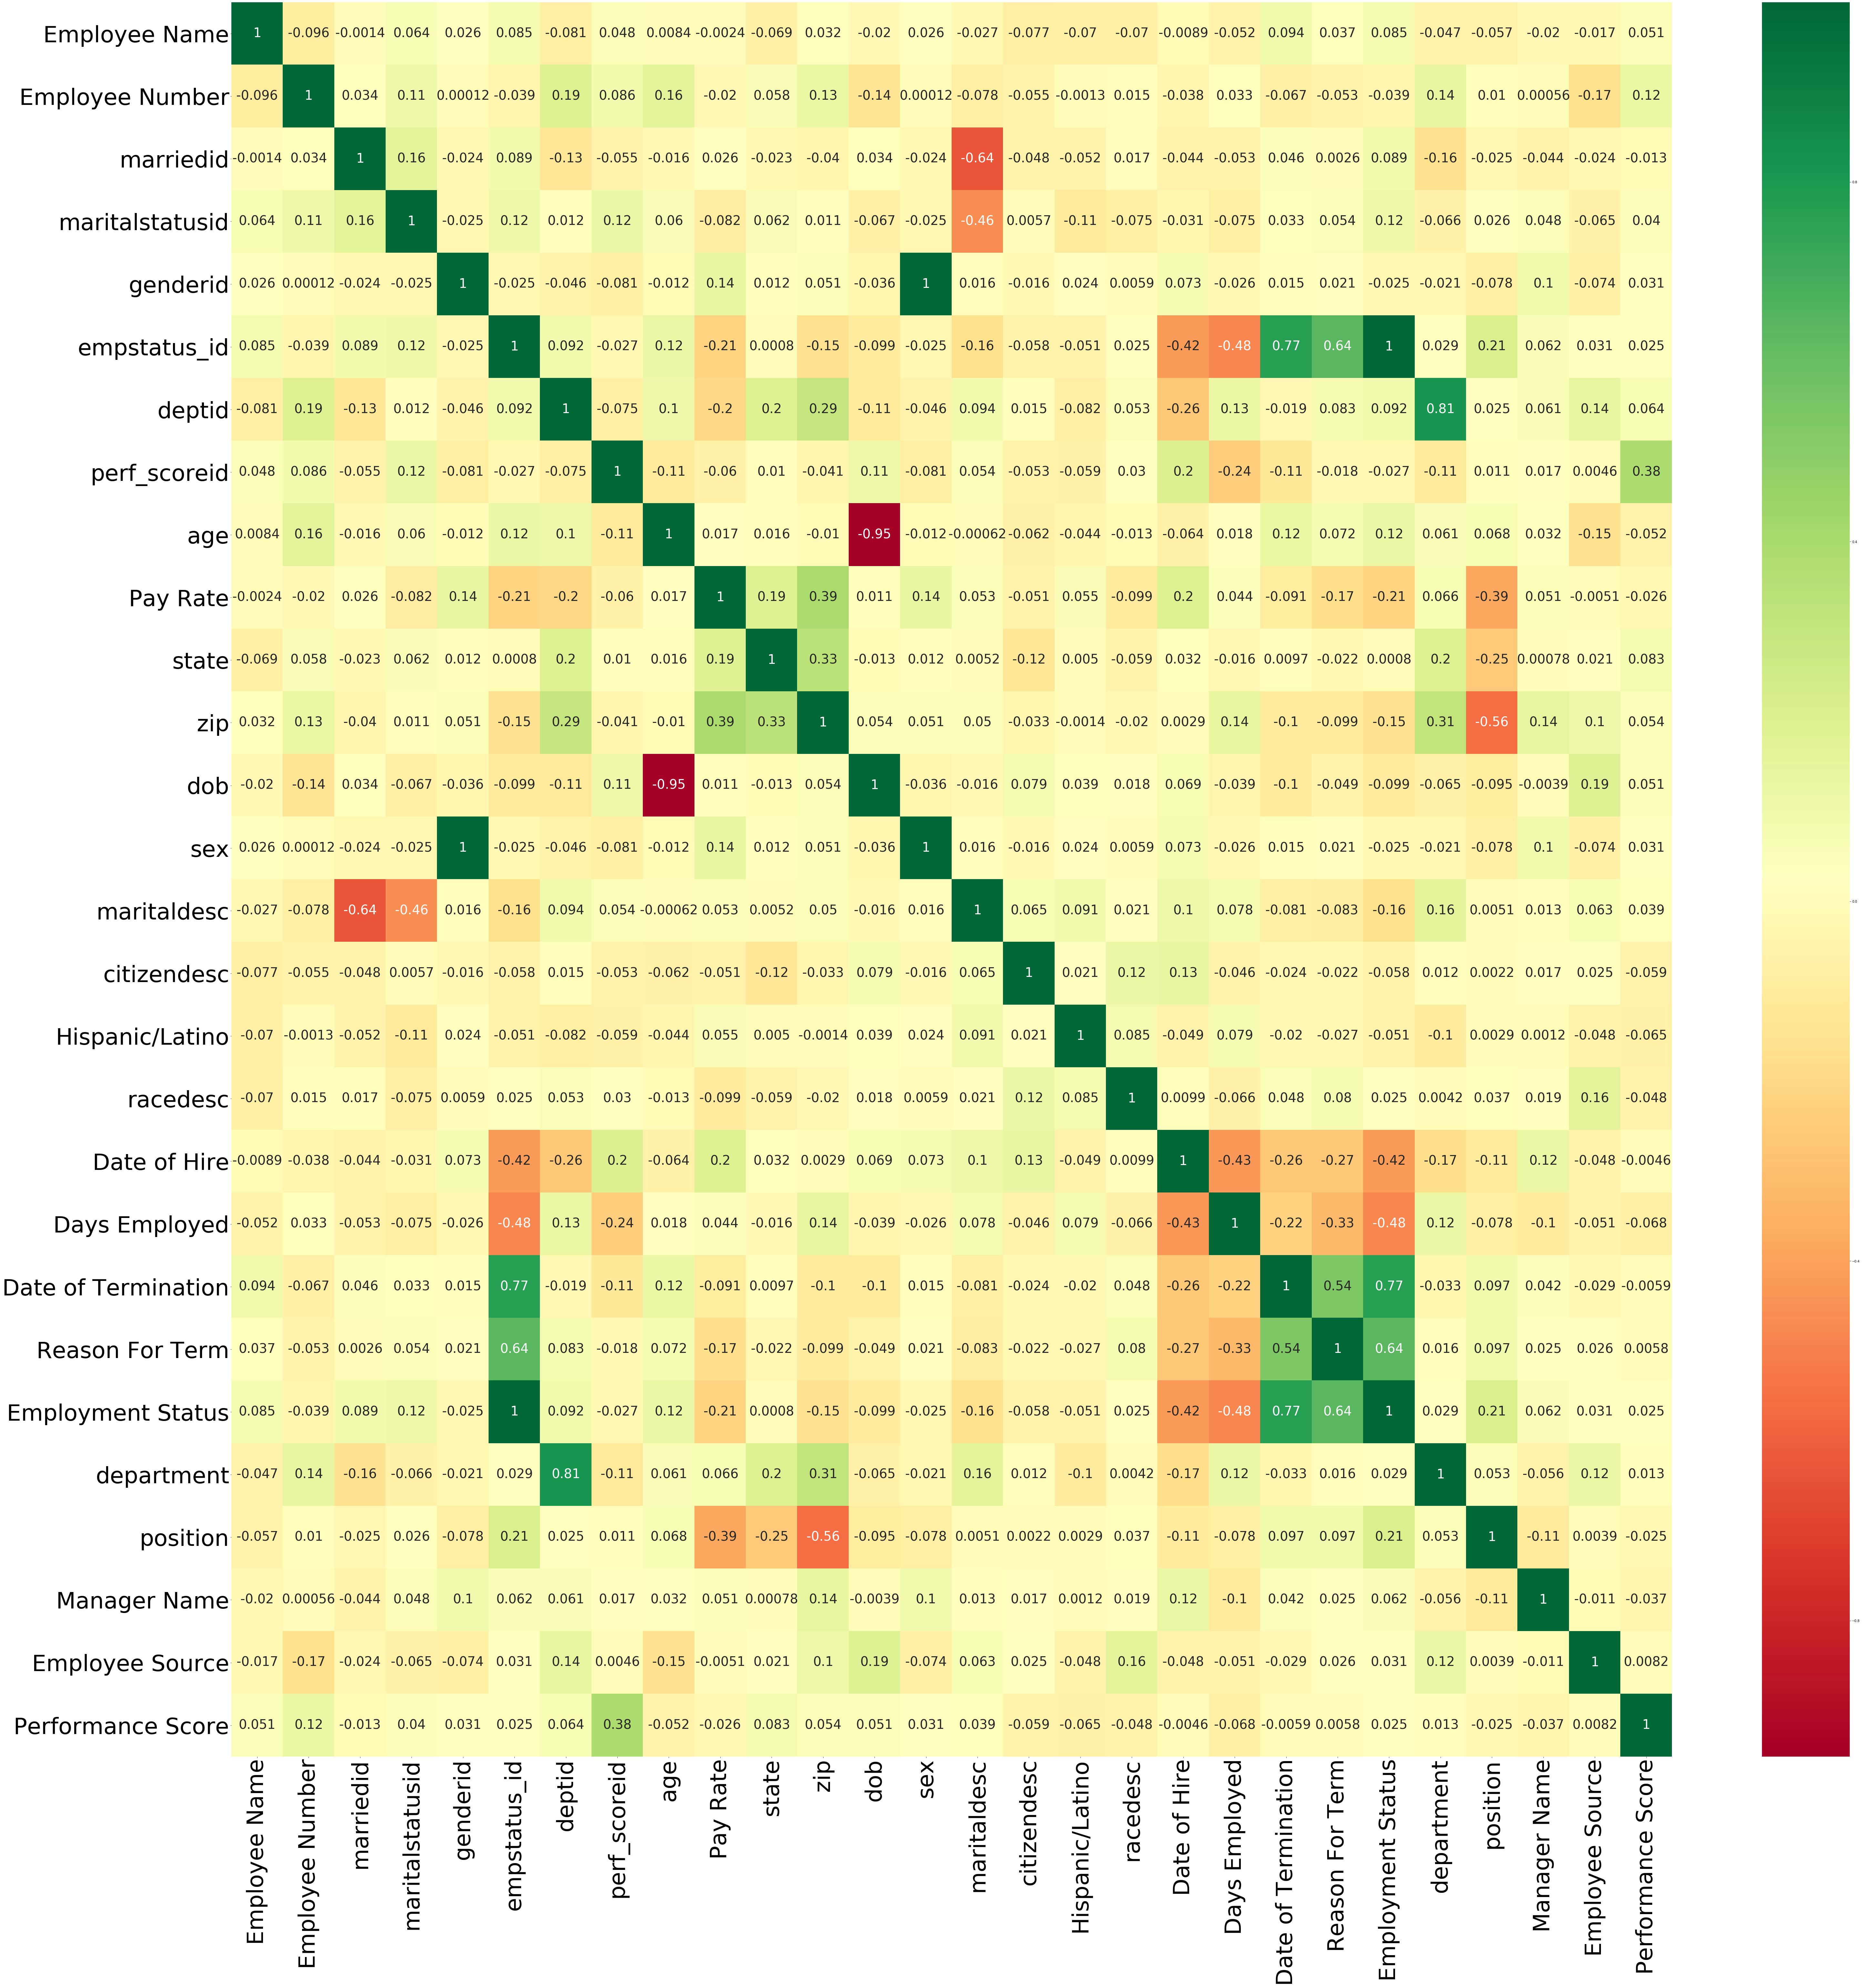

In [82]:
df = hr_dataset.copy().drop(columns=['id'])
df.loc[:, df.dtypes == 'object'] =\
    df.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category').cat.codes)

df_corr = df.corr()
fig, ax = plt.subplots(figsize=(100,100))  
ax = sns.heatmap(df_corr, cmap='RdYlGn', annot=True, ax=ax, annot_kws={"size": 40})
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) 
plt.xticks(fontsize=70, rotation=90)
plt.yticks(fontsize=70, rotation=0)
plt.show()

In [63]:
df.dtypes

id                       int64
Employee Name            int16
Employee Number          int64
marriedid                int64
maritalstatusid          int64
genderid                 int64
empstatus_id             int64
deptid                   int64
perf_scoreid             int64
age                      int64
Pay Rate               float64
state                     int8
zip                      int64
dob                      int16
sex                       int8
maritaldesc               int8
citizendesc               int8
Hispanic/Latino           int8
racedesc                  int8
Date of Hire              int8
Days Employed            int64
Date of Termination       int8
Reason For Term           int8
Employment Status         int8
department                int8
position                  int8
Manager Name              int8
Employee Source           int8
Performance Score         int8
dtype: object

In [58]:
hr_dataset.dtypes

id                       int64
Employee Name           object
Employee Number          int64
marriedid                int64
maritalstatusid          int64
genderid                 int64
empstatus_id             int64
deptid                   int64
perf_scoreid             int64
age                      int64
Pay Rate               float64
state                   object
zip                      int64
dob                     object
sex                     object
maritaldesc             object
citizendesc             object
Hispanic/Latino         object
racedesc                object
Date of Hire            object
Days Employed            int64
Date of Termination     object
Reason For Term         object
Employment Status       object
department              object
position                object
Manager Name            object
Employee Source         object
Performance Score       object
dtype: object

In [35]:
hr_dataset.head()

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [14]:
production_staff.head()

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0


In [13]:
recruiting_costs.head()

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
salary_grid.head()

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45


## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [ ]:
### YOUR CODE HERE ###


